In [36]:
import numpy as np
from matplotlib import pyplot as plt

from ppg_data import load_ppg_raw_data
from ppg_features import ppg_features, get_peaks, bandpass_filter

In [37]:
train_labels, train_data = load_ppg_raw_data("data/train8_reformat.xlsx")
test_labels, test_data = load_ppg_raw_data("data/test8_reformat.xlsx")

In [38]:
# Select a random sample
rand_idx = np.random.randint(0, train_data.shape[0])
sample = train_data[rand_idx, :]
sample_label = train_labels[rand_idx]

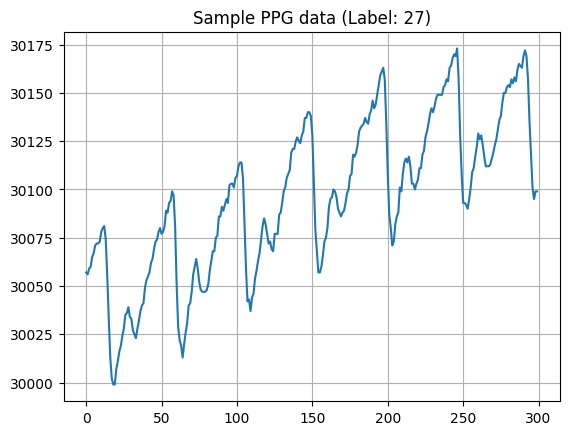

In [39]:
plt.figure()
plt.plot(sample)
plt.title(f"Sample PPG data (Label: {sample_label})")
plt.grid()
plt.show()

In [40]:
up_peaks = get_peaks(sample, fs=50)
down_peaks = get_peaks(-sample, fs=50)

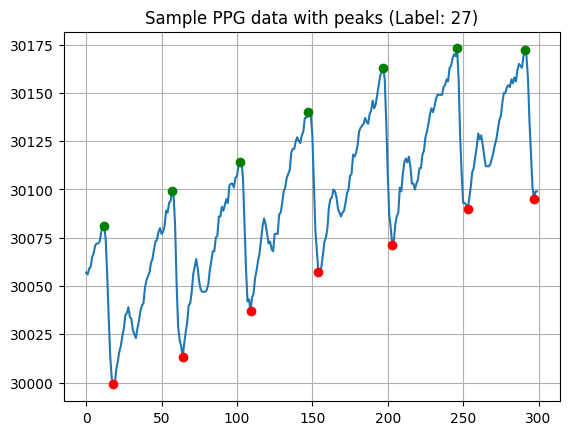

In [41]:
# Plot sample with peaks
plt.figure()
plt.plot(sample)
plt.plot(down_peaks, sample[down_peaks], 'ro')
plt.plot(up_peaks, sample[up_peaks], 'go')
plt.title(f"Sample PPG data with peaks (Label: {sample_label})")
plt.grid()
plt.show()

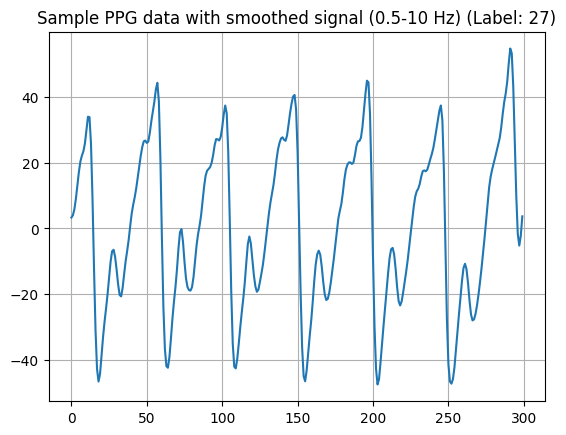

In [42]:
# Smooth the signal
lowcut = 0.5
highcut = 10
smooth_sample = bandpass_filter(sample, fs=50, lowcut=0.5, highcut=10, order=2)
plt.figure()
# plt.plot(sample)
plt.plot(smooth_sample)
plt.title(f"Sample PPG data with smoothed signal ({lowcut}-{highcut} Hz) (Label: {sample_label})")
plt.grid()
plt.show()

In [43]:
# Split sample into segments based on peaks
segments = []
for i in range(1, len(down_peaks)):
    segments.append(sample[down_peaks[i-1]:down_peaks[i]])

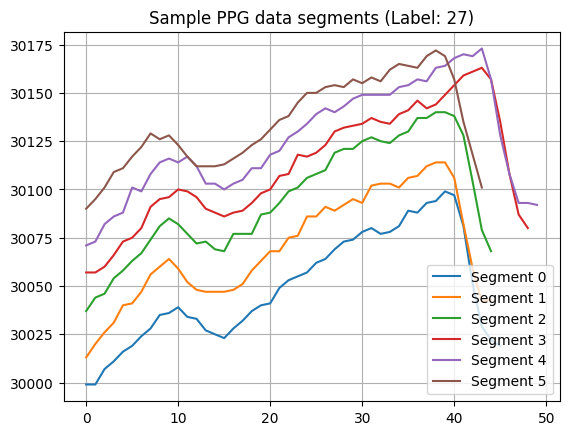

In [44]:
# Plot segments
plt.figure()
for i, seg in enumerate(segments):
    plt.plot(seg, label=f"Segment {i}")
plt.title(f"Sample PPG data segments (Label: {sample_label})")
plt.legend()
plt.grid()
plt.show()

In [45]:
# Smooth segments
smooth_segments = []
for seg in segments:
    smooth_segments.append(bandpass_filter(seg, fs=50, lowcut=lowcut, highcut=highcut))

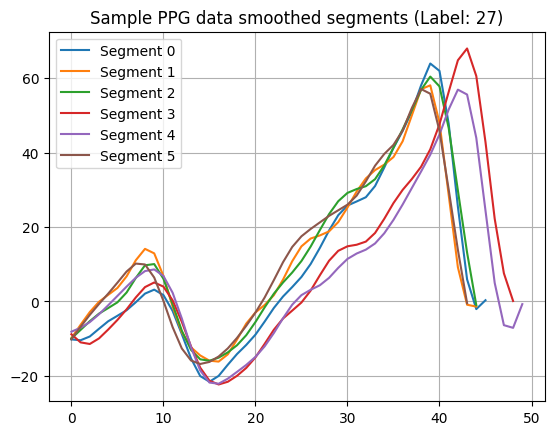

In [46]:
# Plot smoothed segments
plt.figure()
for i, seg in enumerate(smooth_segments):
    plt.plot(seg, label=f"Segment {i}")
plt.title(f"Sample PPG data smoothed segments (Label: {sample_label})")
plt.legend()
plt.grid()
plt.show()